need to install google-cloud-vision (GCP SDK) from conda -c conda-forge

conda env create gcp-cloud-vision
conda install -c conda-forge pillow=10.1.0 pandas=2.1.2 google-cloud-vision=3.4.5 scikit-learn=1.3.2 ipykernel jupyterlab notebook python=3.12.0

to set up kernel in jupyterlabs:

python -m ipykernel install --user --name=gcp-cloud-vision


In [8]:
# Authentication to Google API
import os
import math
from collections import Counter
from google.cloud import vision
import re

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='vision_key.json'
WORD = re.compile(r"\w+")

In [9]:
def detect_text(path):
    """Detects text in the file."""

    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # for non-dense text 
    # response = client.text_detection(image=image)
    # for dense text
    response = client.document_text_detection(image=image)
    texts = response.text_annotations
    ocr_text = []

    for text in texts:
        ocr_text.append(f"\r\n{text.description}")

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    return ocr_text

In [10]:
image_path = "../content/dl1.png"
text = detect_text(image_path)

In [11]:
text[0]

'\r\nPennsylvania DRIVER\'S LICENSE\nDUPS: 00\n4d DLN: 99 999 999\n3 DOB: 08/04/1975\n4b EXP: 08/05/2023\n4a Iss: 03/01/2019\n123\nSAMPLE\n1 SAMPLE\n2 JANICE ANN\n8 123 MAIN STREET\nAPT. 1\nHARRISBURG, PA 17101-0000\nCERTLE\n15 SEX: F 18 EYES: BRO\n16 HGT: 5\'-06"\n9 CLASS: A\n9a END: NONE\n12 RESTR: NONE\nJanice Sample BE 50\nDD:1234567890123\n456789012345\nCDL\nORGAN DONOR'

In [12]:
for line in text:
    print(line)


Pennsylvania DRIVER'S LICENSE
DUPS: 00
4d DLN: 99 999 999
3 DOB: 08/04/1975
4b EXP: 08/05/2023
4a Iss: 03/01/2019
123
SAMPLE
1 SAMPLE
2 JANICE ANN
8 123 MAIN STREET
APT. 1
HARRISBURG, PA 17101-0000
CERTLE
15 SEX: F 18 EYES: BRO
16 HGT: 5'-06"
9 CLASS: A
9a END: NONE
12 RESTR: NONE
Janice Sample BE 50
DD:1234567890123
456789012345
CDL
ORGAN DONOR

Pennsylvania

DRIVER'S

LICENSE

DUPS

:

00

4d

DLN

:

99

999

999

3

DOB

:

08/04/1975

4b

EXP

:

08/05/2023

4a

Iss

:

03/01/2019

123

SAMPLE

1

SAMPLE

2

JANICE

ANN

8

123

MAIN

STREET

APT

.

1

HARRISBURG

,

PA

17101-0000

CERTLE

15

SEX

:

F

18

EYES

:

BRO

16

HGT

:

5

'

-

06

"

9

CLASS

:

A

9a

END

:

NONE

12

RESTR

:

NONE

Janice

Sample

BE

50

DD

:

1234567890123

456789012345

CDL

ORGAN

DONOR


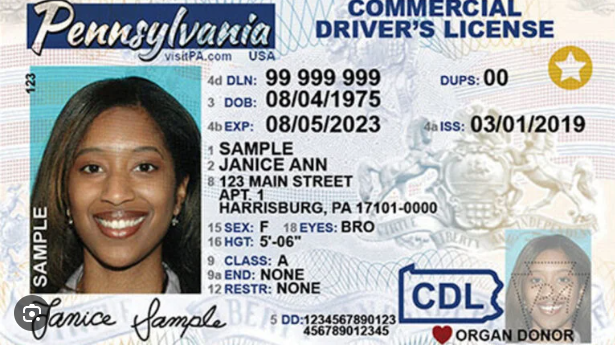

In [13]:
from PIL import Image, ImageDraw
image=Image.open(image_path)
image

In [ ]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [ ]:
text1 = "This is a foo bar sentence ."
text2 = "This sentence is similar to a foo bar sentence ."

text1 = "AUSTIN FORTE Notary Public - State of Colorado "
text2 = "Austin forth Notary Public - State of Colorado "

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print("Cosine:", cosine)

In [ ]:
# print(cosine_similarity(vector1, vector2))

In [ ]:
# vision_client = vision.ImageAnnotatorClient()

# image_path = "content/im25.jpeg"

# with open(image_path, "rb") as image_file:
#     content = image_file.read()
        
# image = vision.Image(content=content)

# # image_uri = 'https://upload.wikimedia.org/wikipedia/commons/b/bf/Mobile_phone_IMEI.jpg'

# # image.source.image_uri = image_uri

In [ ]:
# response = vision_client.text_detection(image=image)

In [ ]:
# response.text_annotations[0]

In [ ]:
# text = response.text_annotations[0].description

# imeis = re.findall('[0-9]{14,15}', text)

# print(imeis)